In [ ]:
# Margaret Johnston
# Homework 5 - due 28 February

# Homework:

Write a shooting method to calculate the Legendre polynomial with $n=5$:

$\frac{d^{2}P_{n}}{dt^{2}}=\frac{1}{1=t^{2}}\left[2t\frac{dP_{n}}{dt}-n(n+1)P_{n}\right]$

where $P_{n}(-1)=(-1)^{n}$ and $P_{n}(1)=1$

We must solve the differential equation:

$y''=\frac{1}{1-t^{2}}\left[2ty-n(n+1)y\right] \rightarrow y''=\frac{1}{1-t^{2}}\left[2ty-30y\right]$

with initial conditions:

$y(0)=0$, $y'(0)=y'_{a}$

and vary $y'(0)$ until $y(1)=1$ using the bisection method

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import legendre

Transforming the system to have only first order equations we have

$\frac{\partial y_{1}}{\partial t}=y_{2} \\
\frac{\partial y_{2}}{\partial t}=\frac{1}{1-t^{2}}\left[2ty_{1}-30y_{1}\right]$

In [2]:
# defining P_5
def f(t, y):
    f=np.zeros(2)
    f[0]=y[1]
    f[1]=1/(1-t*t)*(2*t*y[0]-30*y[0])
    return f
    
def rk4(t, h, y, n):
    k1 = np.zeros(n)
    k2 = np.zeros(n)
    k3 = np.zeros(n)
    k4 = np.zeros(n)
    k1=h*f(t,y)
    k2=h*f(t+0.5*h,y+0.5*k1)
    k3=h*f(t+0.5*h,y+0.5*k2)
    k4=h*f(t+h,y+k3)
    y+=(k1+2.*(k2+k3)+k4)/6.
    return y



In [3]:
# setting up for y_{a}=1.5

h=1.e-4
tmax = 1-h

ya = 2.5 
y=[0.,ya]
xp_big=[y[0]]
ta=[0]
t=0

while(t<tmax):
    if((t+h)>tmax):
        h=tmax-t
    y = rk4(t,h,y,2)
    xp_big=np.append(xp_big,y[0])
    ta=np.append(ta,t)
    t = t+h



In [4]:
# setting up for y_{a}=2.5

h=1.e-4
tmax = 1-h

yb = 1.5 
y=[0.,yb]
xp_sml=[y[0]]
ta=[0]
t=0

while(t<tmax):
    if((t+h)>tmax):
        h=tmax-t
    y = rk4(t,h,y,2)
    xp_sml=np.append(xp_sml,y[0])
    ta=np.append(ta,t)
    t = t+h

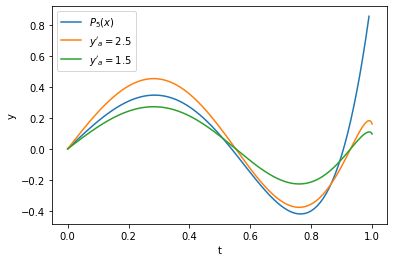

In [5]:
# setting up the actual Legendre polynomial
n = 5
Pn = legendre(n)
x_Leg = np.arange(0,1,0.01)
y_Leg = Pn(x_Leg)

# plotting the comparison
plt.plot(x_Leg,y_Leg,label="$P_{5}(x)$")
plt.plot(ta,xp_big,label="$y'_{a}=2.5$")
plt.plot(ta,xp_sml,label="$y'_{a}=1.5$")

plt.xlabel("t")
plt.ylabel("y")
plt.legend()
plt.show()

loop:0   guess:1.75   endpoint:0.11222166487680119
loop:1   guess:2.375   endpoint:0.1523008309042316
loop:2   guess:2.6875   endpoint:0.1723404139179446
loop:3   guess:2.84375   endpoint:0.18236020542480286
loop:4   guess:2.921875   endpoint:0.1873701011782307
loop:5   guess:2.9609375   endpoint:0.18987504905494562
loop:6   guess:2.98046875   endpoint:0.1911275229933035
loop:7   guess:2.990234375   endpoint:0.1917537599624819
loop:8   guess:2.9951171875   endpoint:0.19206687844707113
loop:9   guess:2.99755859375   endpoint:0.19222343768936667
loop:10   guess:2.998779296875   endpoint:0.19230171731051263
loop:11   guess:2.9993896484375   endpoint:0.19234085712108726
loop:12   guess:2.99969482421875   endpoint:0.19236042702637238
loop:13   guess:2.999847412109375   endpoint:0.19237021197901594
loop:14   guess:2.9999237060546875   endpoint:0.19237510445533731
loop:15   guess:2.9999618530273438   endpoint:0.19237755069349957
loop:16   guess:2.999980926513672   endpoint:0.19237877381257984

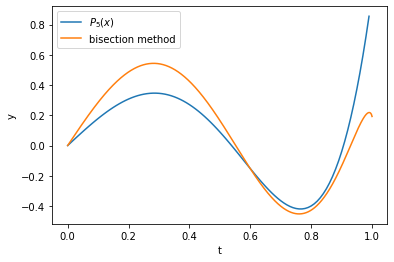

In [6]:
# needed for solving the differential equations
h=1.e-4
tmax = 1-h
y=[0.,0.]
xp=[y[0]]
ta=[0]
t=0
# needed for bisection 
target_P = 0.85518 # the value of P_5(0.9998)
ya_min = 0.5
ya_max = 3.
loop_max = 50
acc = 0.5

for iii in range(loop_max):
    # reset values for the loop
    h=1.e-4
    tmax = 1-h
    ya=(ya_min+ya_max)/2.
    y=[0.,ya]
    xp=[y[0]]
    ta=[0]
    t=0
    #print("loop:{}   guess:{}   endpoint:{}".format(iii,ya,xp[-1]))
    while(t<tmax):
        if((t+h)>tmax):
            h=tmax-t
        y = rk4(t,h,y,2)
        xp=np.append(xp,y[0])
        ta=np.append(ta,t)
        t = t+h
    if(np.abs(xp[-1]-target_P)<acc):
        break
    if xp[-1]<target_P:
        ya_min = ya
    else:
        ya_max = ya
    print("loop:{}   guess:{}   endpoint:{}".format(iii,ya,xp[-1]))

print("Ending calculation:")
print("y'={:.5f}".format(ya))

# setting up the actual Legendre polynomial
n = 5
Pn = legendre(n)
x_Leg = np.arange(0,1,0.01)
y_Leg = Pn(x_Leg)

# plotting the comparison
plt.plot(x_Leg,y_Leg,label="$P_{5}(x)$")
plt.plot(ta,xp,label="bisection method")

plt.xlabel("t")
plt.ylabel("y")
plt.legend()
plt.show()

For graduate students:

Use the forward and backward Euler methods to solve the nuclear decay equation

$\frac{dy}{dt}=-100y$

Solve with several values of $dt$ ($10^{-4}$, $10^{-3}$, $10^{-2}$, $10^{-1}$, $1$) and plot all results for each method on the same plot.

This is a simple ordinary differential equation. Analytically, we know that this nuclear decay behavior will result in an exponential curve.

The forward Euler method:

$\frac{dy(t)}{dt}\simeq\frac{y(t_{n+1})-y(t_{n})}{h}=f(t,y) \\
y_{n+1}=y_{n}+h f(t_n, y_{n})$

The backward Euler method:

$\frac{dy}{dx}\simeq\frac{y(t_{n-1})-y(t_{n})}{h}=f(t,y) \rightarrow \frac{dy}{dx}\simeq\frac{y(t_{n})-y(t_{n+1})}{h}=f(t,y) \\
-y_{n+1}=y_{n}+h f(t_n, y_{n})$

In [7]:
def f2(t,y):
    f=-100*y
    return f

# forward Euler
def eu2(t,h,y):
    fv=f2(t,y)
    y += h*fv
    return y

# backward Euler
def eu3(t,h,y):
    fv=f2(t,y)
    y = -(y+h*fv)
    return y


Unfortunately, each value of $dt$ produces arrays of different size because the same domain is now being sliced with different sized steps.

Therefore, they must all be calculated separately. 

In [8]:
tmax=1
h=1.e-4
yf=10.
yb=10.
xf_1e4 = []
xb_1e4 = []
t_1e4  = []
t=0

while(t<tmax):
    if((t+h)>tmax):
        h=tmax-t
    yf = eu2(t,h,yf)
    yb = eu3(t,h,yb)
    xf_1e4 = np.append(xf_1e4,yf)
    xb_1e4 = np.append(xb_1e4,yb)
    t_1e4  = np.append(t_1e4,t)
    t  = t+h


In [9]:
h=1.e-3  
yf=10.
yb=10.
xf_1e3 = []
xb_1e3 = []
t_1e3  = []
t=0

while(t<tmax):
    if((t+h)>tmax):
        h=tmax-t
    yf = eu2(t,h,yf)
    yb = eu3(t,h,yb)
    xf_1e3 = np.append(xf_1e3,yf)
    xb_1e3 = np.append(xb_1e3,yb)
    t_1e3  = np.append(t_1e3,t)
    t  = t+h


In [10]:
h=1.e-2  
yf=10.
yb=10.
xf_1e2 = []
xb_1e2 = []
t_1e2  = []
t=0

while(t<tmax):
    if((t+h)>tmax):
        h=tmax-t
    yf = eu2(t,h,yf)
    yb = eu3(t,h,yb)
    xf_1e2 = np.append(xf_1e2,yf)
    xb_1e2 = np.append(xb_1e2,yb)
    t_1e2  = np.append(t_1e2,t)
    t  = t+h


In [11]:
h=1.e-1  
yf=10.
yb=10.
xf_1e1 = []
xb_1e1 = []
t_1e1  = []
t=0

while(t<tmax):
    if((t+h)>tmax):
        h=tmax-t
    yf = eu2(t,h,yf)
    yb = eu3(t,h,yb)
    xf_1e1 = np.append(xf_1e1,yf)
    xb_1e1 = np.append(xb_1e1,yb)
    t_1e1  = np.append(t_1e1,t)
    t  = t+h


In [12]:
h=1.  
yf=10.
yb=10.
xf_1e0 = []
xb_1e0 = []
t_1e0  = []
t=0

while(t<tmax):
    if((t+h)>tmax):
        h=tmax-t
    yf = eu2(t,h,yf)
    yb = eu3(t,h,yb)
    xf_1e0 = np.append(xf_1e0,yf)
    xb_1e0 = np.append(xb_1e0,yb)
    t_1e0  = np.append(t_1e0,t)
    t  = t+h


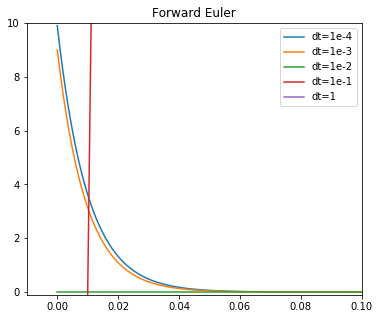

In [13]:
plt.figure(figsize=(6,5))
plt.title("Forward Euler")
plt.ylim(-0.1,10)
plt.xlim(-0.01,0.1)
plt.plot(t_1e4,xf_1e4,label='dt=1e-4')
plt.plot(t_1e3,xf_1e3,label='dt=1e-3')
plt.plot(t_1e2,xf_1e2,label='dt=1e-2')
plt.plot(t_1e1,xf_1e1,label='dt=1e-1')
plt.plot(t_1e0,xf_1e0,label='dt=1')
plt.legend(loc='upper right')

plt.show()

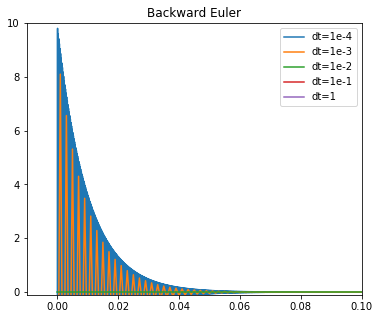

In [14]:
plt.figure(figsize=(6,5))
plt.title("Backward Euler")
plt.ylim(-0.1,10)
plt.xlim(-0.01,0.1)
plt.plot(t_1e4,xb_1e4,label='dt=1e-4')
plt.plot(t_1e3,xb_1e3,label='dt=1e-3')
plt.plot(t_1e2,xb_1e2,label='dt=1e-2')
plt.plot(t_1e1,xb_1e1,label='dt=1e-1')
plt.plot(t_1e0,xb_1e0,label='dt=1')
plt.legend(loc='upper right')

plt.show()

Only the two smallest values of $dt$ (1E-4, 1E-3) yield appropriate results (they successfully reconstruct an exponential curve).

